In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [46]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [47]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [48]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [49]:
train.shape, test.shape

((421570, 5), (115064, 4))

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [51]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [52]:
train['Date']=pd.to_datetime(train['Date'])

In [53]:
train['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [54]:
train['Store'].value_counts()

13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: Store, dtype: int64

In [55]:
train['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65], dtype=int64)

In [56]:
copy_data=train.copy()
import calendar
copy_data['Month'] = pd.DatetimeIndex(copy_data['Date']).month
copy_data['Month'] = copy_data['Month'].apply(lambda x: calendar.month_abbr[x])
copy_data['Year'] = pd.DatetimeIndex(copy_data['Date']).year
copy_data['Day']=pd.DatetimeIndex(copy_data['Date']).day

In [57]:
copy_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Month,Year,Day
0,1,1,2010-02-05,24924.50,False,Feb,2010,5
1,1,1,2010-02-12,46039.49,True,Feb,2010,12
2,1,1,2010-02-19,41595.55,False,Feb,2010,19
3,1,1,2010-02-26,19403.54,False,Feb,2010,26
4,1,1,2010-03-05,21827.90,False,Mar,2010,5


In [58]:
copy_data.index=range(len(copy_data))

In [59]:
copy_data.drop(columns={'Date'},axis=1,inplace=True)

In [60]:
copy_data=copy_data.join(pd.get_dummies(copy_data['Month']))
copy_data.drop(columns={'Month'},axis=1,inplace=True)

In [61]:
copy_data=copy_data.join(pd.get_dummies(copy_data['IsHoliday']))
copy_data.drop(columns={'IsHoliday'},axis=1,inplace=True)

In [62]:
copy_data.head()

,Store,Dept,Weekly_Sales,Year,Day,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,False,True
0,1,1,24924.50,2010,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,1,46039.49,2010,12,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,1,41595.55,2010,19,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,1,19403.54,2010,26,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,1,1,21827.90,2010,5,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [63]:
copy_data.shape

(421570, 19)

In [64]:
X= copy_data.drop(['Weekly_Sales'],1)
y= copy_data['Weekly_Sales']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [66]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((337256, 18), (337256,), (84314, 18), (84314,))

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
model = RandomForestRegressor(n_estimators=100,n_jobs=-1)

In [69]:
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [70]:
y_pred=model.predict(X_test)

In [71]:
y_pred=pd.DataFrame(data=y_pred,index=X_test.index)

In [72]:
((y_pred[0]-y_test)**2).sum()/len(y_test)

15517174.040777812

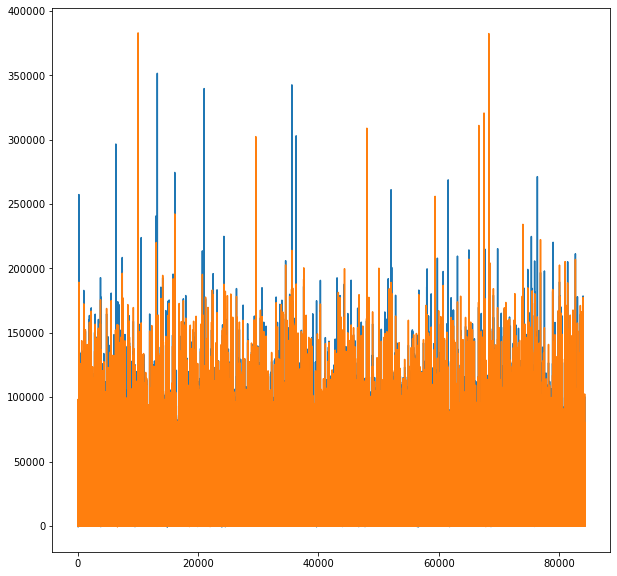

In [73]:
plt.figure(figsize=(10,10))
plt.plot(range(len(y_pred)),y_test)
plt.plot(range(len(y_pred)),y_pred[0])

In [74]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred[0])

15517174.040777812

In [75]:
X_test.head()

,Store,Dept,Year,Day,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,False,True
233571,24,55,2011,6,0,0,0,0,0,0,0,0,1,0,0,0,1,0
88992,10,11,2010,29,0,0,0,0,0,0,0,0,0,0,1,0,1,0
367842,39,59,2010,25,0,0,0,0,0,0,1,0,0,0,0,0,1,0
184359,19,60,2011,23,0,0,0,0,0,0,0,0,0,0,0,1,1,0
26175,3,45,2010,19,0,0,0,1,0,0,0,0,0,0,0,0,1,0


## Prediction on Test Data set

In [76]:
test=test.join(pd.get_dummies(test['IsHoliday']))

In [77]:
import calendar
test['Month'] = pd.DatetimeIndex(test['Date']).month
test['Month'] = test['Month'].apply(lambda x: calendar.month_abbr[x])
test['Year'] = pd.DatetimeIndex(test['Date']).year
test['Day']=pd.DatetimeIndex(test['Date']).day

In [78]:
test=test.join(pd.get_dummies(test['Month']))
test.drop(columns={'Month','Date','IsHoliday'},axis=1,inplace=True)

In [79]:
test['Aug']=0
test['Sep']=0
test['Oct']=0

In [80]:
test.shape

(115064, 18)

In [81]:
test.head()

,Store,Dept,False,True,Year,Day,Apr,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Aug,Sep,Oct
0,1,1,1,0,2012,2,0,0,0,0,0,0,0,0,1,0,0,0
1,1,1,1,0,2012,9,0,0,0,0,0,0,0,0,1,0,0,0
2,1,1,1,0,2012,16,0,0,0,0,0,0,0,0,1,0,0,0
3,1,1,0,1,2012,23,0,0,0,0,0,0,0,0,1,0,0,0
4,1,1,1,0,2012,30,0,0,0,0,0,0,0,0,1,0,0,0


In [82]:
test=test[X_test.columns]

In [83]:
test.head()

,Store,Dept,Year,Day,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,False,True
0,1,1,2012,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,1,1,2012,9,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,1,1,2012,16,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,1,1,2012,23,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,1,1,2012,30,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [84]:
pred=pd.DataFrame(data=model.predict(test),index=test.index)

In [85]:
pred.head(10)

,0
0,39905.8970
1,19899.6631
2,20169.3995
3,20656.2369
4,20106.7333
5,35507.3543
6,48149.3410
7,51090.7627
8,25112.0160
9,16646.3616


In [86]:
data_test= pd.read_csv('test.csv')
pred=pred.join(data_test['Date'])

In [92]:
pred.index=pred.Date
pred.drop(['Date'],1,inplace =True)

In [104]:
pred.columns=['Weekly Sales']
pred

,Weekly Sales
Date,
2012-11-02,39905.8970
2012-11-09,19899.6631
2012-11-16,20169.3995
2012-11-23,20656.2369
2012-11-30,20106.7333
...,...
2013-06-28,648.1835
2013-07-05,675.7983
2013-07-12,757.8463


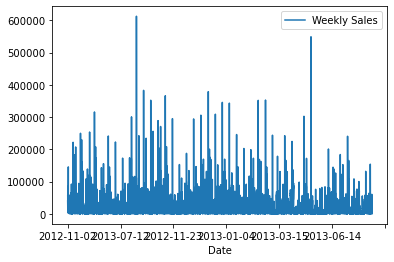

In [106]:
pred.plot()

In [108]:
pred.to_csv("Results.csv")